## __Problem statement__
__The objective is to develop a machine learning model that can predict the power consumption (Zone 1 Power Consumption) of Wellington, New Zealand based on various environmental and meteorological factors. The goal is to create an accurate predictive model that can assist in managing energy resources efficiently and optimizing power consumption in that zone.__

### __Installing and Importing the required packages__

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor # Make sure to import the Regressor
from xgboost import XGBRegressor # Make sure to import the Regressor

import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# stat tools
import statsmodels.api as sm
from scipy.stats import kurtosis, skew

### __Information about the dataset::__

- Sr no. Serial Number
- Temperature: The temperature in Celsius at the specific location.
- Humidity: The relative humidity percentage at the location. (g.m-3, i.e. units of grams of water vapor per cubic meter of air. )
- Wind Speed: The speed of the wind at the location. (nautical mile per hour )
- General Diffuse Flows: Refer to a specific measurement or calculation related to the amount or intensity of diffuse solar radiation in a particular area. (Mtr sqr per sec )
- Diffuse Flows: The measure of diffuse solar radiation. (Mtr sqr per sec )
- Air Quality Index: An index representing the air quality in the area. (particles in micrograms per cubic meter. )
- Cloudiness: The level of cloud cover or cloudiness at the location. (1-Yes,0-No)
- Zone 1 Power Consumption: The power consumption in the specific zone, which is the target variable to be predicted. (in KWR- Target value)

### __Downloading the dataset__

In [80]:
df = pd.read_excel('/Users/gullu/Desktop/capstone projects/interview selection project/City Power Consumption.xlsx')

In [81]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [16]:
df.shape

(52583, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


The 'df.info()' output shows 'Temperature' and 'Humidity' as 'object' type despite being quantitative.

In [21]:
df['Temperature'].unique()

array([6.559, 6.414, 6.313, ..., 6.947, 6.758, 6.58], dtype=object)

In [23]:
df['Humidity'].unique()

array([73.8, 74.5, 75, ..., 41.96, 41.22, 45.89], dtype=object)

In [84]:
## Convert 'Temperature' and 'Humidity' columns to numeric, coercing non-numeric values to NaN.
df['Temperature'] = pd.to_numeric(df['Temperature'], errors = 'coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors = 'coerce')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52260 non-null  float64
 2   Humidity                      52557 non-null  float64
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [88]:
## Checking for missing values
df.isna().sum()

S no                              0
Temperature                     323
Humidity                         26
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

<Axes: >

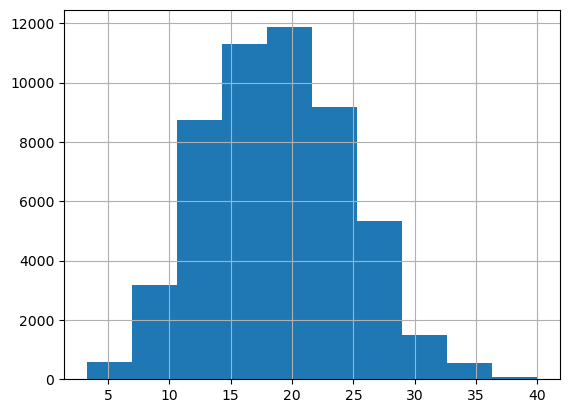

In [23]:
df['Temperature'].hist()

<Axes: >

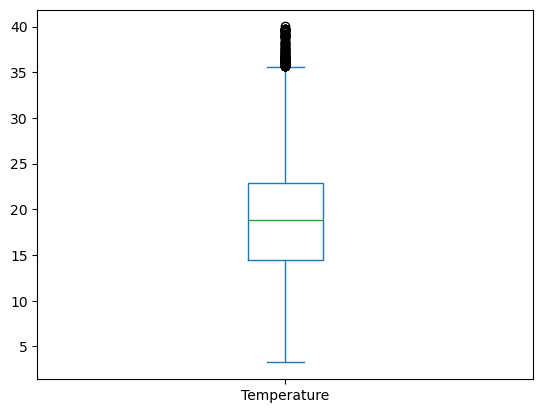

In [25]:
df['Temperature'].plot(kind='box')

In [27]:
df['Temperature'].skew()

0.1938392195838435

<Axes: >

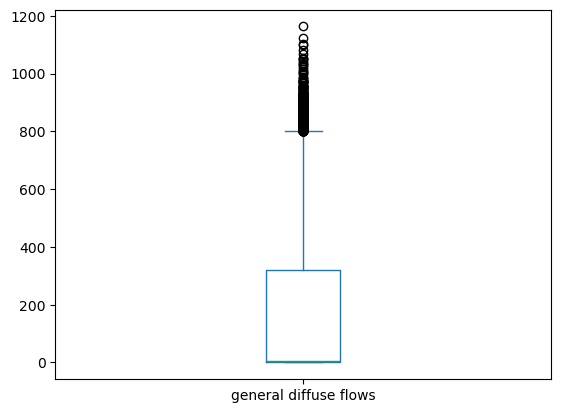

In [29]:
df['general diffuse flows'].plot(kind='box')

In [31]:
df['general diffuse flows'].skew()

1.3051779131873251

#### __treating missing values::__

In [90]:
cols = df.columns

for col in cols:
    if df[col].isna().sum() > 0: # check if the column has missing value
        median_value = df[col].median()
        df[col].fillna(median_value, inplace = True) ## impute median inplace of missing values
        print(f"Imputed median in place of missing values in '{col}' with median : '{median_value}'")

print(f"Checking if there still any missing value")
print(df.isnull().sum())

Imputed median in place of missing values in 'Temperature' with median : '18.82'
Imputed median in place of missing values in 'Humidity' with median : '69.88'
Imputed median in place of missing values in 'Wind Speed' with median : '0.086'
Imputed median in place of missing values in 'general diffuse flows' with median : '5.226'
Imputed median in place of missing values in 'diffuse flows' with median : '4.412'
Imputed median in place of missing values in 'Air Quality Index (PM)' with median : '155.0'
Checking if there still any missing value
S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64


In [92]:
df.drop(columns = 'S no').describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,52583.0,18.827815,5.795171,3.24700,14.45000,18.82000,22.870000,40.01000
Humidity,52583.0,68.286244,15.541347,11.34000,58.34000,69.88000,81.400000,94.80000
Wind Speed,52583.0,1.952796,2.347332,0.05000,0.07800,0.08600,4.915000,6.48300
general diffuse flows,52583.0,181.923162,264.143797,0.00400,0.06200,5.22600,317.000000,1163.00000
diffuse flows,52583.0,74.852230,124.072864,0.01100,0.12200,4.41200,100.450000,936.00000
Air Quality Index (PM),52583.0,154.499363,2.871077,150.00000,152.00000,155.00000,157.000000,159.00000
Cloudiness,52583.0,0.009338,0.096180,0.00000,0.00000,0.00000,0.000000,1.00000
Power Consumption in A Zone,52583.0,31061.821779,8021.057455,9457.75076,24738.85899,31189.78723,36721.582445,52204.39512


#### __Observations::__
1. 52583 rows and  9 columns
2. The average temperature is 18.83°C, with range between 14.45°C (25th percentile) and 22.87°C (75th percentile), covering a comfortable span.
3. The average humidity is 68.29%, with a median of 69.88%, indicating consistently moderate to high humidity levels.
4. Wind speeds are predominantly very low, with a remarkably low mean of 1.95 m/s and an even lower median of 0.086 m/s
5. Cloudiness is a categorical feature. All quartiles (25%, 50%, 75%) for Cloudiness are 0.00, meaning that at least 75% of the time, there was no cloud cover recorded.
6. Both "general diffuse flows" (mean 181.92) and "diffuse flows" (mean 74.85) exhibit extreme positive skewness.
7. The Air Quality Index (PM) demonstrates remarkable consistency and elevated levels. The mean is 154.50, with a very small standard deviation of 2.87.
8. 

## __::EDA::__

In [35]:
df.skew()

S no                             0.000000
Temperature                      0.194462
Humidity                        -0.627568
Wind Speed                       0.468408
general diffuse flows            1.313883
diffuse flows                    2.461325
Air Quality Index (PM)          -0.001800
Cloudiness                      10.203384
 Power Consumption in A Zone     0.031528
dtype: float64

    left skew = humidity
    moderately right skewed = wind speed
    highly right skewed = general diffuse flow, diffuse flow

In [94]:
cols = cols.drop('S no')

In [96]:
cols

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       ' Power Consumption in A Zone'],
      dtype='object')

## Univariant analysis

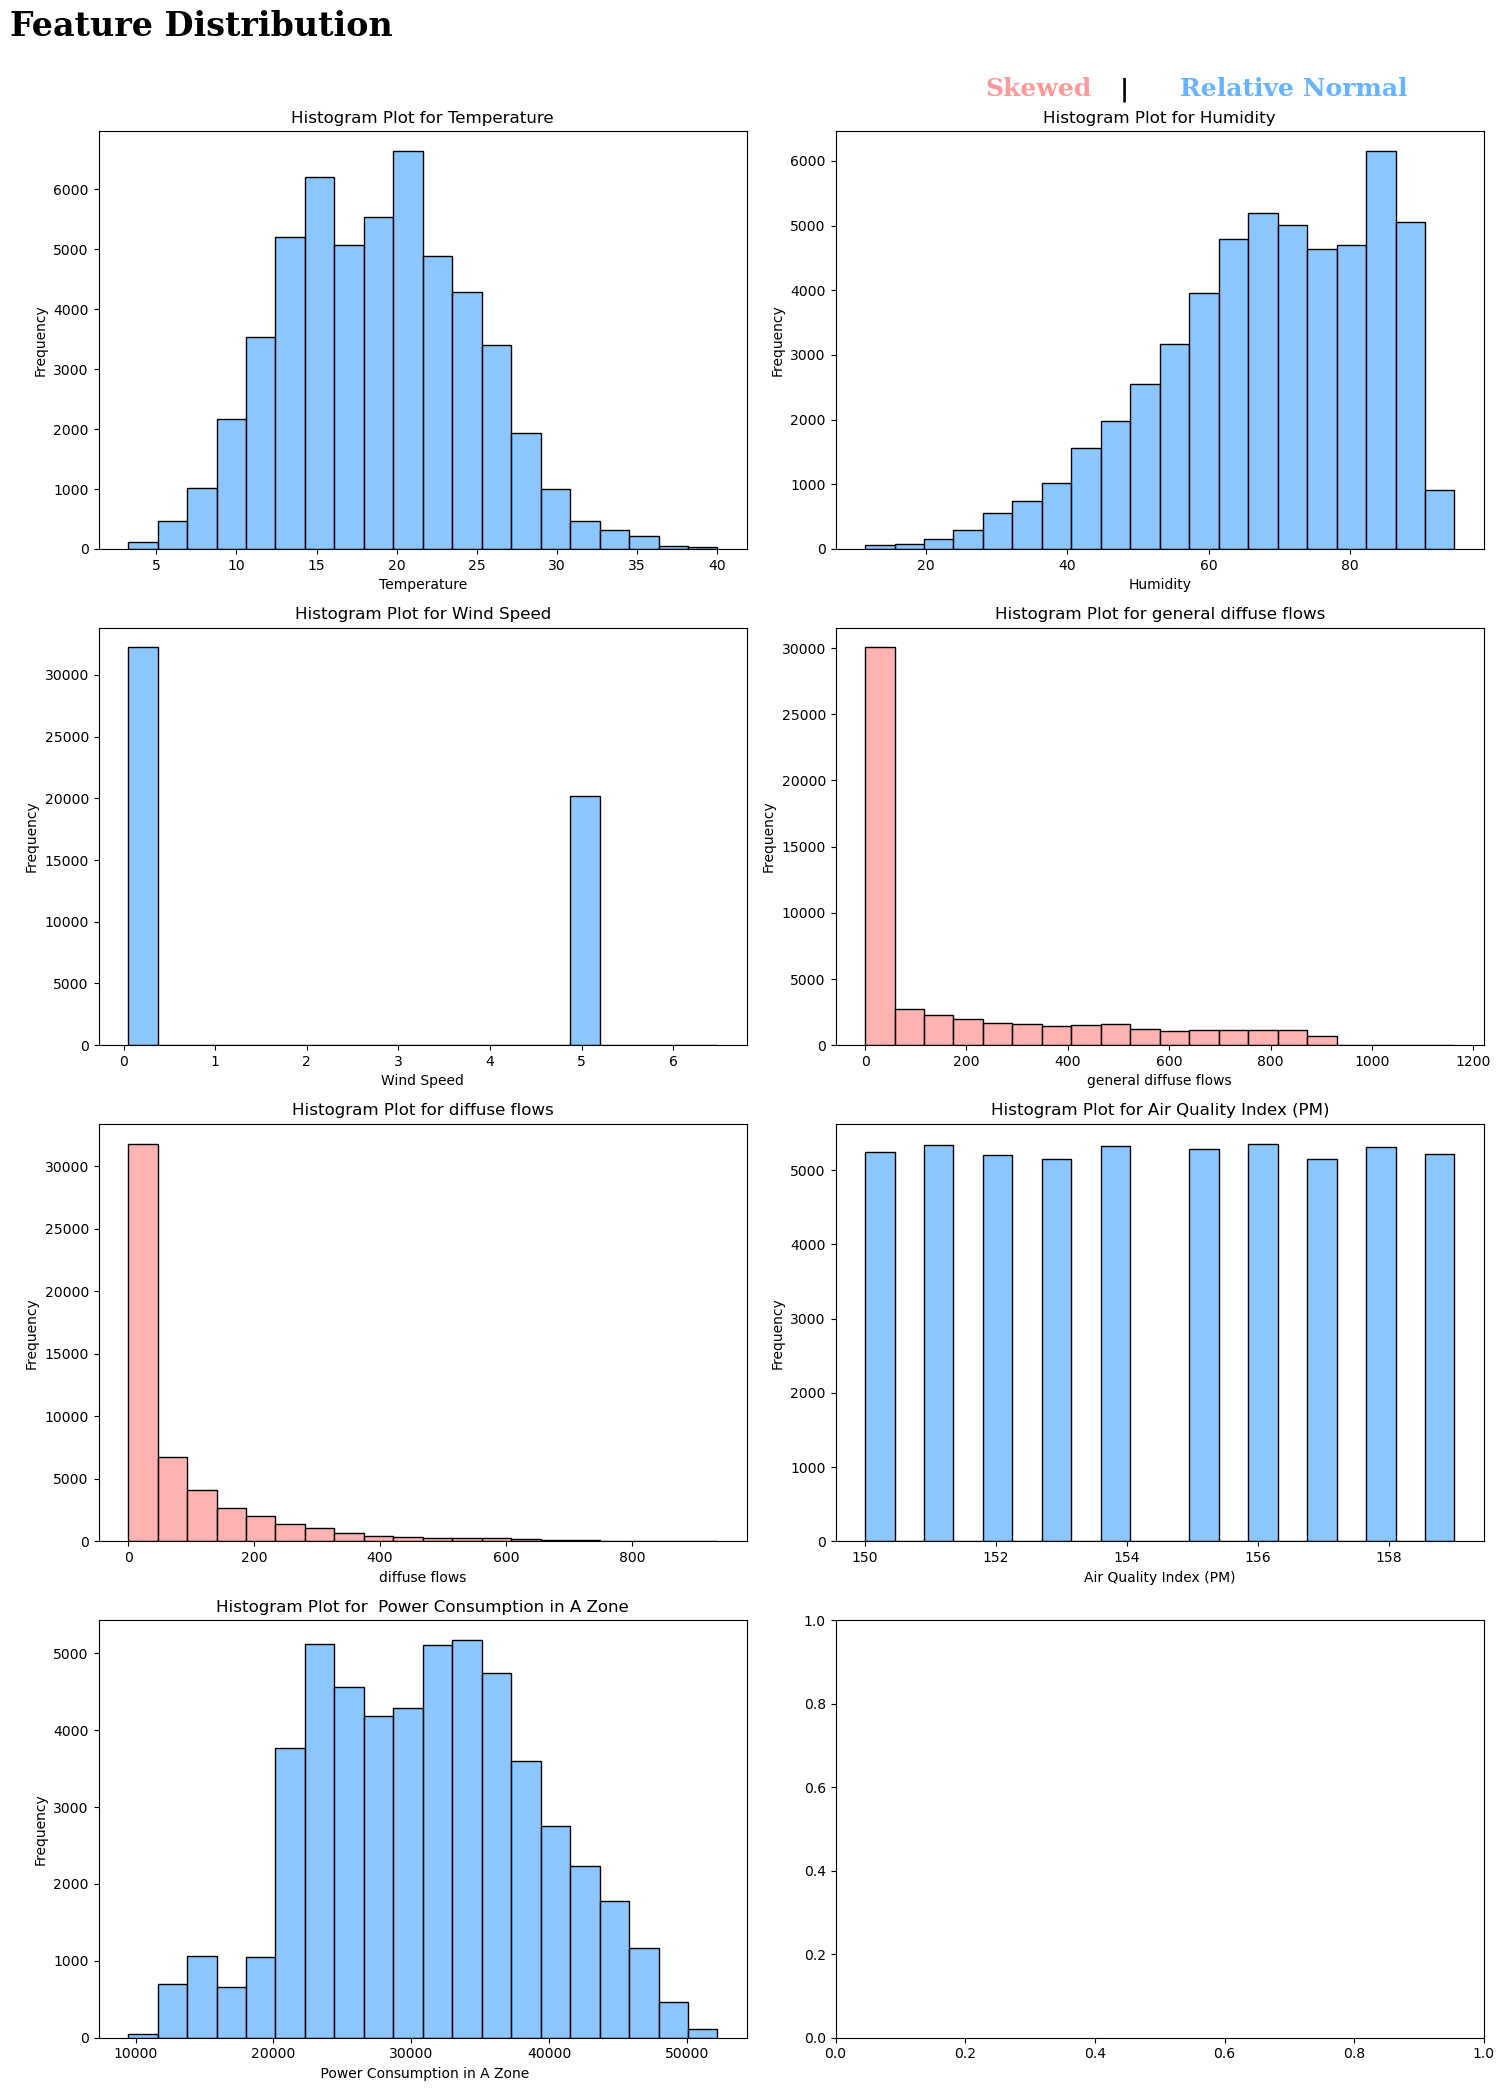

In [98]:
## Distribution graphs
numerical_features = cols.drop('Cloudiness')

fig, axes = plt.subplots(4,2, figsize = (15,20))
fig.text(0, 1.03, 'Feature Distribution', {'font':'serif', 'size' : 24, 'weight':'bold'}, alpha = 1)
fig.text(0.65, 1, 'Skewed', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#ff9999'})
fig.text(0.74, 1, '|', {'font':'serif', 'size' : 18, 'weight':'bold'})
fig.text(0.78, 1, 'Relative Normal', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#66b3ff'})

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    skewness = skew(df[col].dropna())

    if abs(skewness) > 1:
        color = '#ff9999'
    else:
        color = '#66b3ff'

    sns.histplot(df[col], ax = axes[i], kde = False, bins = 20, color = color)
    axes[i].set_title(f"Histogram Plot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

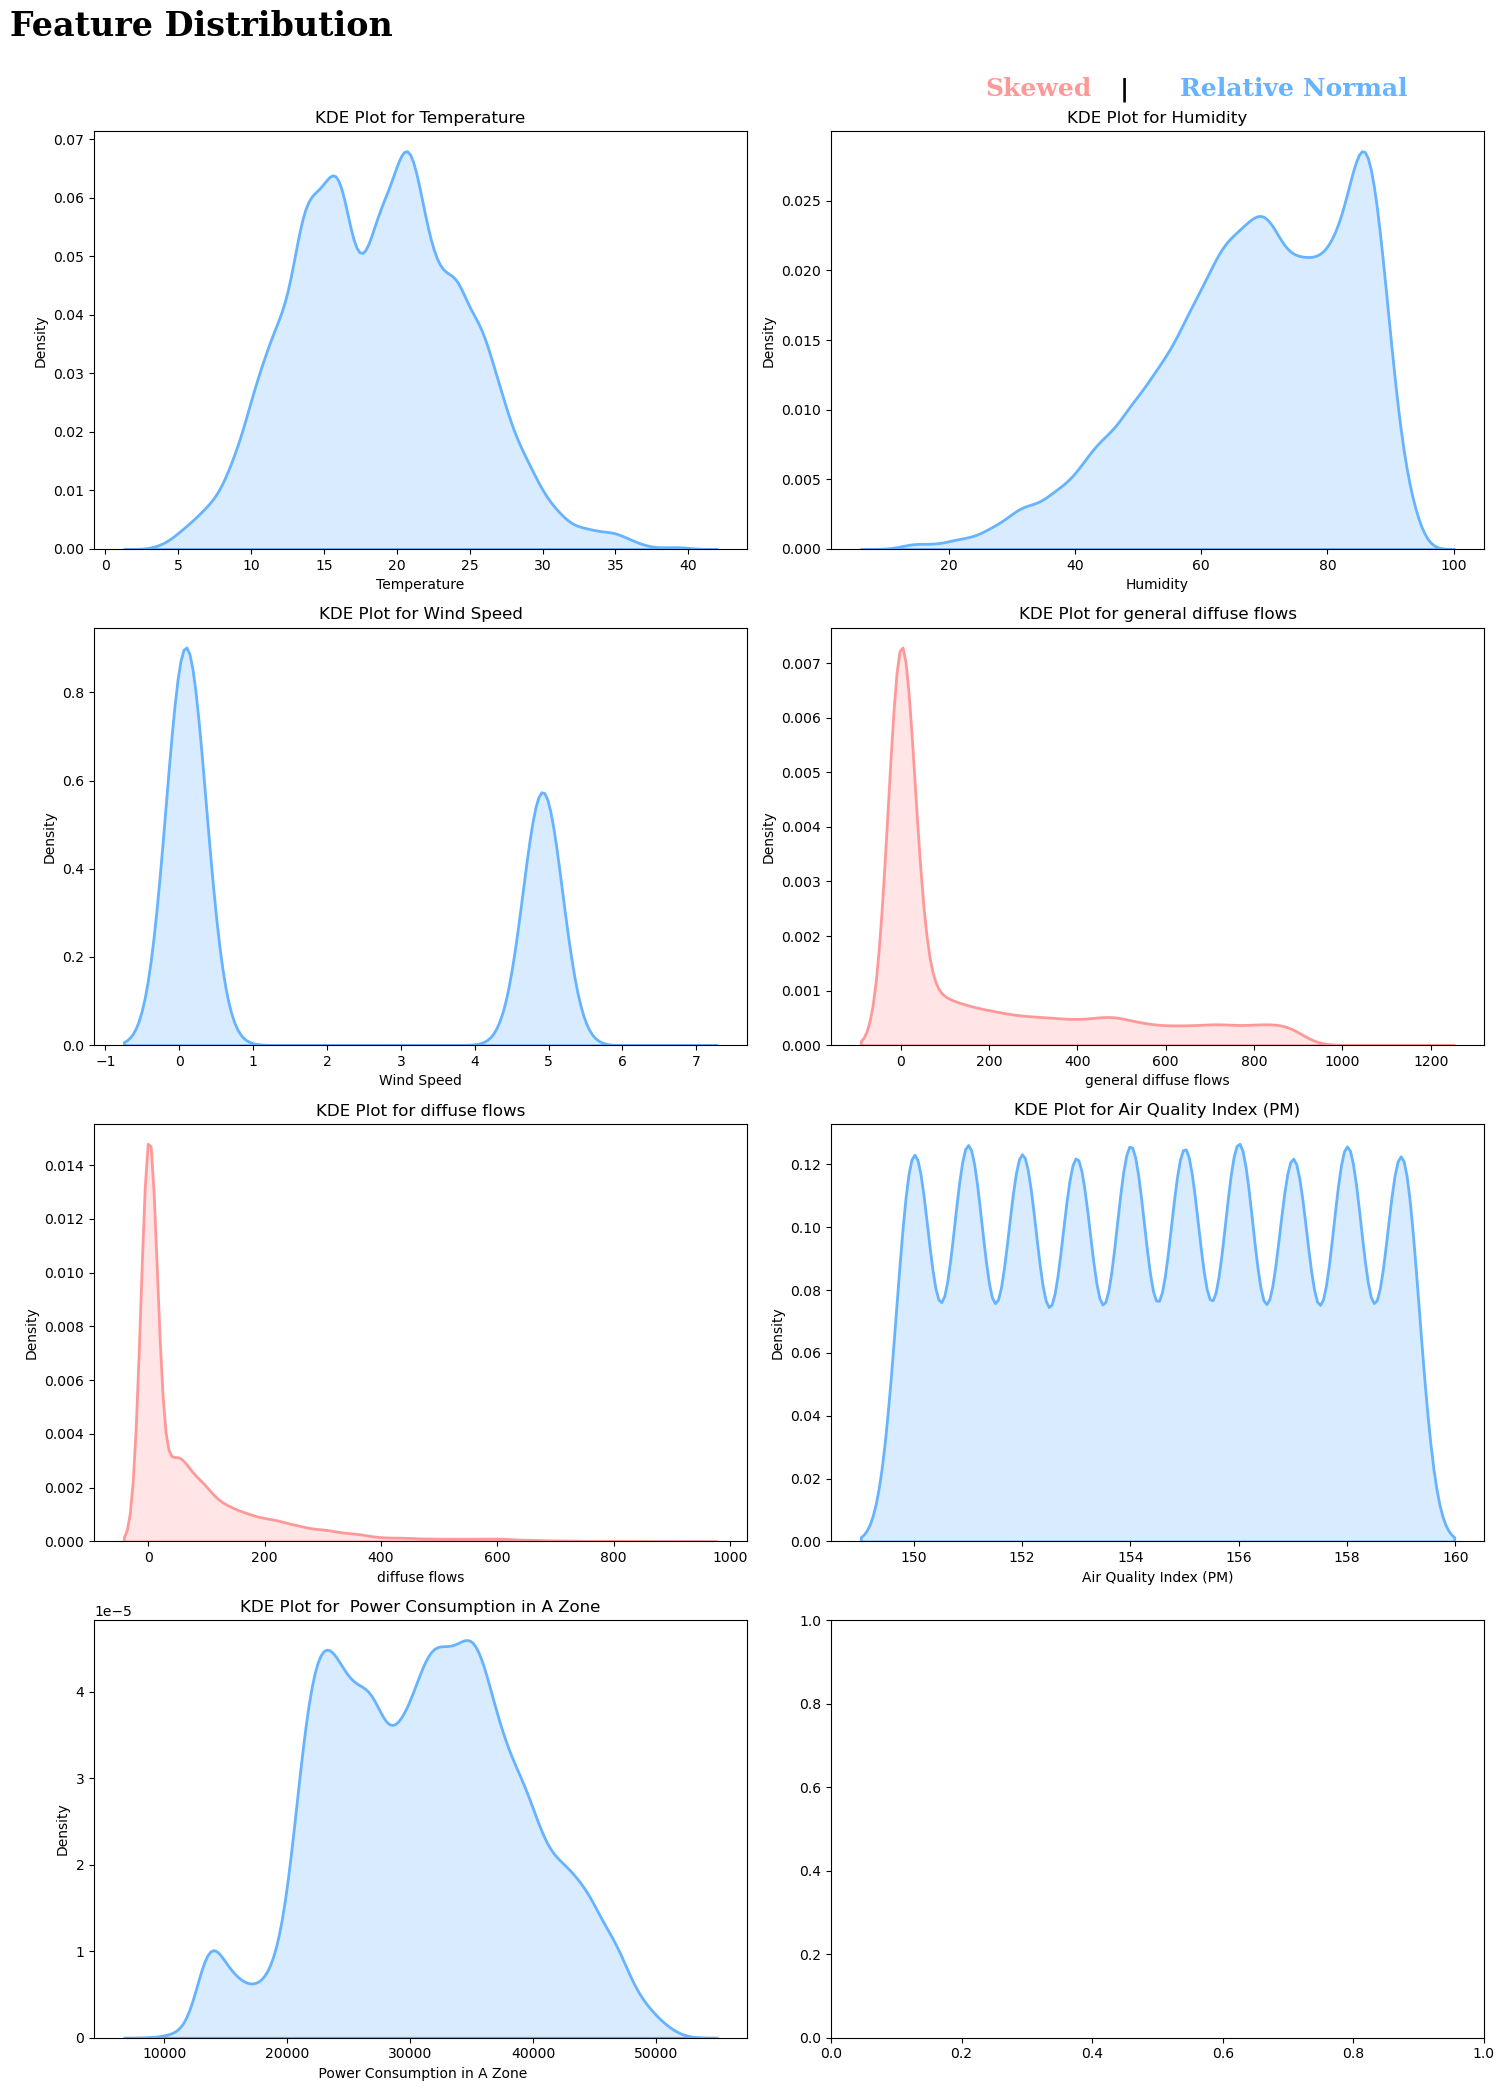

In [100]:
## Distribution graphs
numerical_features = cols.drop('Cloudiness')

fig, axes = plt.subplots(4,2, figsize = (15,20))
fig.text(0, 1.03, 'Feature Distribution', {'font':'serif', 'size' : 24, 'weight':'bold'}, alpha = 1)
fig.text(0.65, 1, 'Skewed', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#ff9999'})
fig.text(0.74, 1, '|', {'font':'serif', 'size' : 18, 'weight':'bold'})
fig.text(0.78, 1, 'Relative Normal', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#66b3ff'})

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    skewness = skew(df[col].dropna())

    if abs(skewness) > 1:
        color = '#ff9999'
    else:
        color = '#66b3ff'

    sns.kdeplot(df[col], ax=axes[i], fill=True, color=color, linewidth=2)
    axes[i].set_title(f"KDE Plot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

### __Observations:__
1. __Temperature:__
    - Histogram: Symmetric, bell-shaped distribution.
    - KDE Plot: Smooth, peaks around 15–22°C; slight bimodality.
    - Nearly normal distribution. No transformation needed. Suitable for most ML models directly.
2. __Humidity:__
    - Histogram: Slight right-skewed.
    - KDE Plot: Peaks around 80–90%; smooth rise from 30%.
    - Slight right skew.
3. __Wind Speed:__
    - Histogram: Bimodal (spikes at 0 and ~5).
    - KDE Plot: Shows two clear peaks at 0 and 5.
4. __General Diffuse Flows:__
    - Histogram: Heavily right-skewed.
    - KDE Plot: High peak near 0, long right tail.
    - log or sqrt transformation needed
5. __Diffuse Flows:__
    - Histogram: Strong right skew.
    - KDE Plot: High peak near zero, similar long tail as general diffuse flows.
    - log transformation needed to handle skewness
6. __Air Quality Index (PM):__
    - Histogram: Uniform-like distribution.
    - KDE Plot: Unusual oscillating peaks (likely due to discrete intervals).
7. __Power Consumption in A Zone:__
    - Histogram: Slight right-skewed but overall close to normal.
    - KDE Plot: Bimodal appearance; two mild peaks between 25,000–35,000

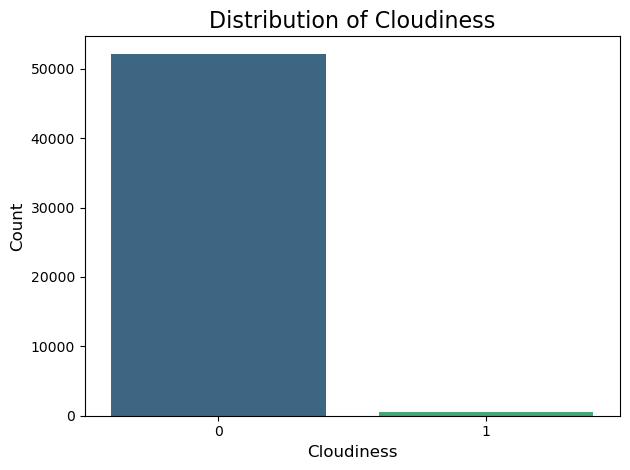

In [102]:
## Barplot for 'Cloudiness'

sns.countplot(data = df, x = 'Cloudiness', palette = 'viridis')
plt.title('Distribution of Cloudiness', fontsize=16)
plt.xlabel('Cloudiness', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

## Bivarient analysis

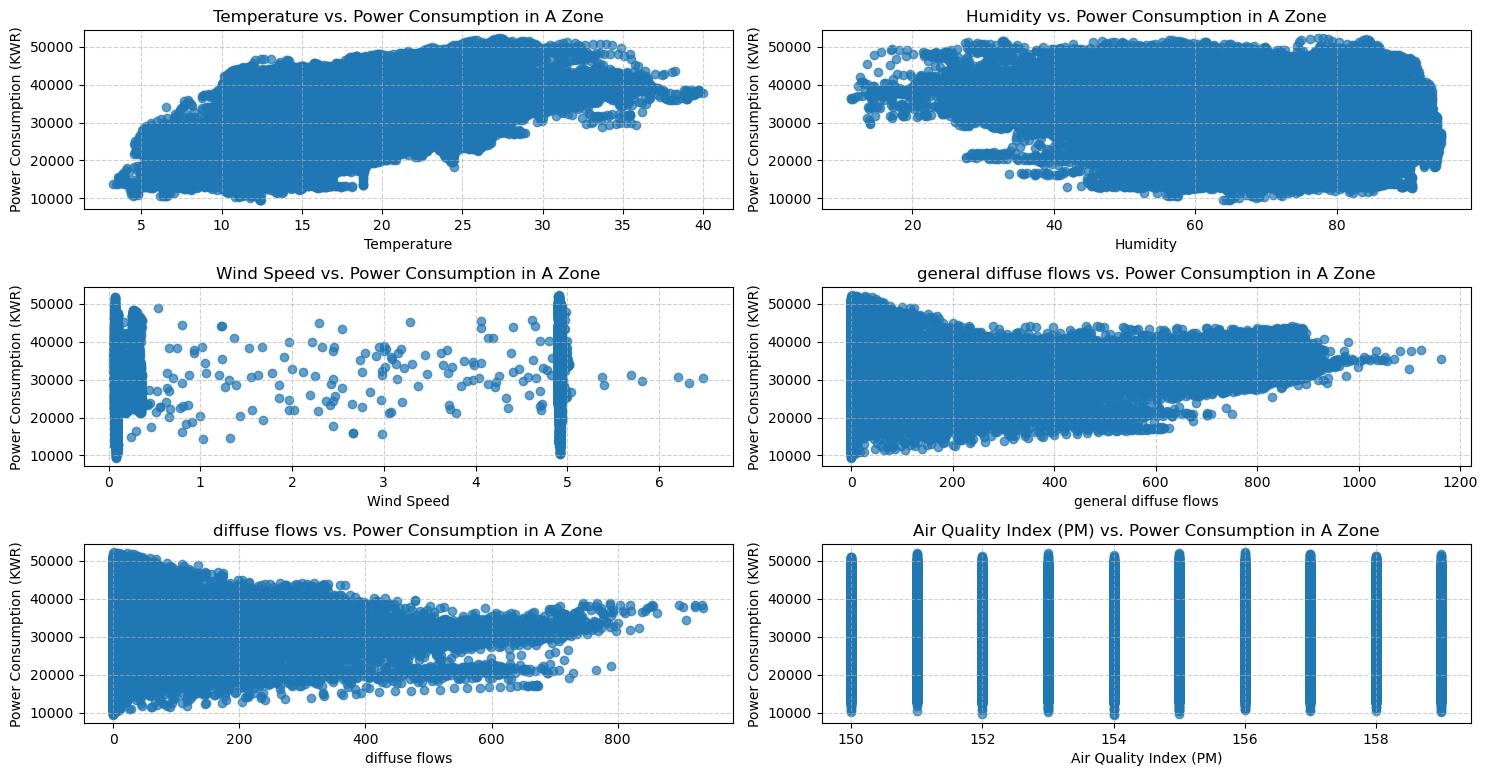

In [104]:
## Scatter plot of features w.r.t. Power consumption to understand their relations
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
numerical_features1 = numerical_features.drop(' Power Consumption in A Zone')

for i, col in enumerate(numerical_features1):
    plt.subplot(4,2,i+1) # Adjust subplot grid based on number of features
    plt.scatter(df[col], df[' Power Consumption in A Zone'], alpha=0.7)
    plt.title(f'{col} vs. Power Consumption in A Zone')
    plt.xlabel(col)
    plt.ylabel('Power Consumption (KWR)')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### __Observations:__
1. __Temperature vs. Power Consumption:__
    -  there is a upward trend, but with a saturation effect at higher temperatures.
    -  "Positive correlation" — higher temperatures are associated with higher power usage, possibly due to increased air conditioning.
2. __Humidity vs. Power Consumption:__
    -  Appears scattered
    -  "Weak or no linear correlation"
3. __Wind Speed vs. Power Consumption:__
    - Data is heavily clustered at 0 and 5.
    - Not continuous, likely categorical or discrete input. No clear correlation
4. __General Diffuse Flows vs. Power Consumption:__
    - as diffuse flow increases, power consumption tends to slightly decrease.
    - "Negative correlation"
5. __Diffuse Flows vs. Power Consumption:__
    - "Negative correlation" with power consumption.
6. __Air Quality Index (PM) vs. Power Consumption:__
    - Likely categorical or measured in integer steps. "No visible correlation".   

In [106]:
# --- Calculate Pearson Correlation Coefficients for all relevant numerical features ---
correlations = {}
for col in numerical_features1:
    # Calculate Pearson correlation coefficient
    # .corr() handles NaN values by default (pairwise deletion)
    correlation = df[col].corr(df[' Power Consumption in A Zone'], method='pearson')
    correlations[col] = correlation

print("\nPearson Correlation Coefficients:")
correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Pearson Correlation'])
print(correlation_df)


Pearson Correlation Coefficients:
                  Feature  Pearson Correlation
0             Temperature             0.558681
1                Humidity            -0.230235
2              Wind Speed             0.207191
3   general diffuse flows             0.209634
4           diffuse flows             0.062676
5  Air Quality Index (PM)            -0.001137


### __Observation:__
1. Temperature is the most influential feature for predicting power consumption. Consider it a priority feature.
2. Humidity, Wind Speed, and General Diffuse Flows show weak correlations
3. Diffuse Flows and Air Quality Index (PM) offer very little to no linear relationship

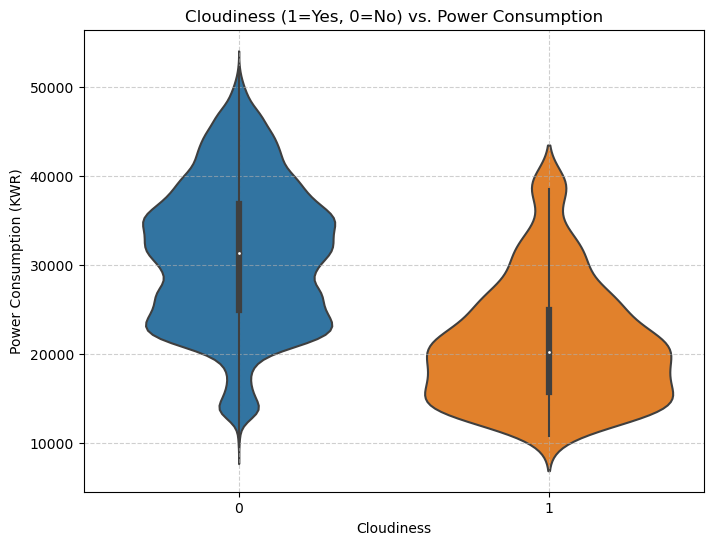

In [108]:
## Violin plot for Cloudiness

plt.figure(figsize=(8, 6))
sns.violinplot(x='Cloudiness', y=' Power Consumption in A Zone', data=df)
plt.title('Cloudiness (1=Yes, 0=No) vs. Power Consumption')
plt.xlabel('Cloudiness')
plt.ylabel('Power Consumption (KWR)') # Removed as it's not standard
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('cloudiness_vs_power_consumption_violinplot.png')
plt.show()

- Left side (Cloudiness = 0): Represents non-cloudy (clear) conditions
- Right side (Cloudiness = 1): Represents cloudy conditions
- The width of the plot shows density (where most data points lie).
- The white dot is the median, thick bar is the IQR (Interquartile Range).

__Observation:__
- Power consumption is significantly higher during clear (non-cloudy) weather.
- This aligns with expectations — clear days may be hotter → more cooling/AC usage → increased power consumption.
- Cloudy days may have lower temperature and brightness, leading to lower energy usage. 

## Outliers

In [110]:
numerical_features

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)',
       ' Power Consumption in A Zone'],
      dtype='object')

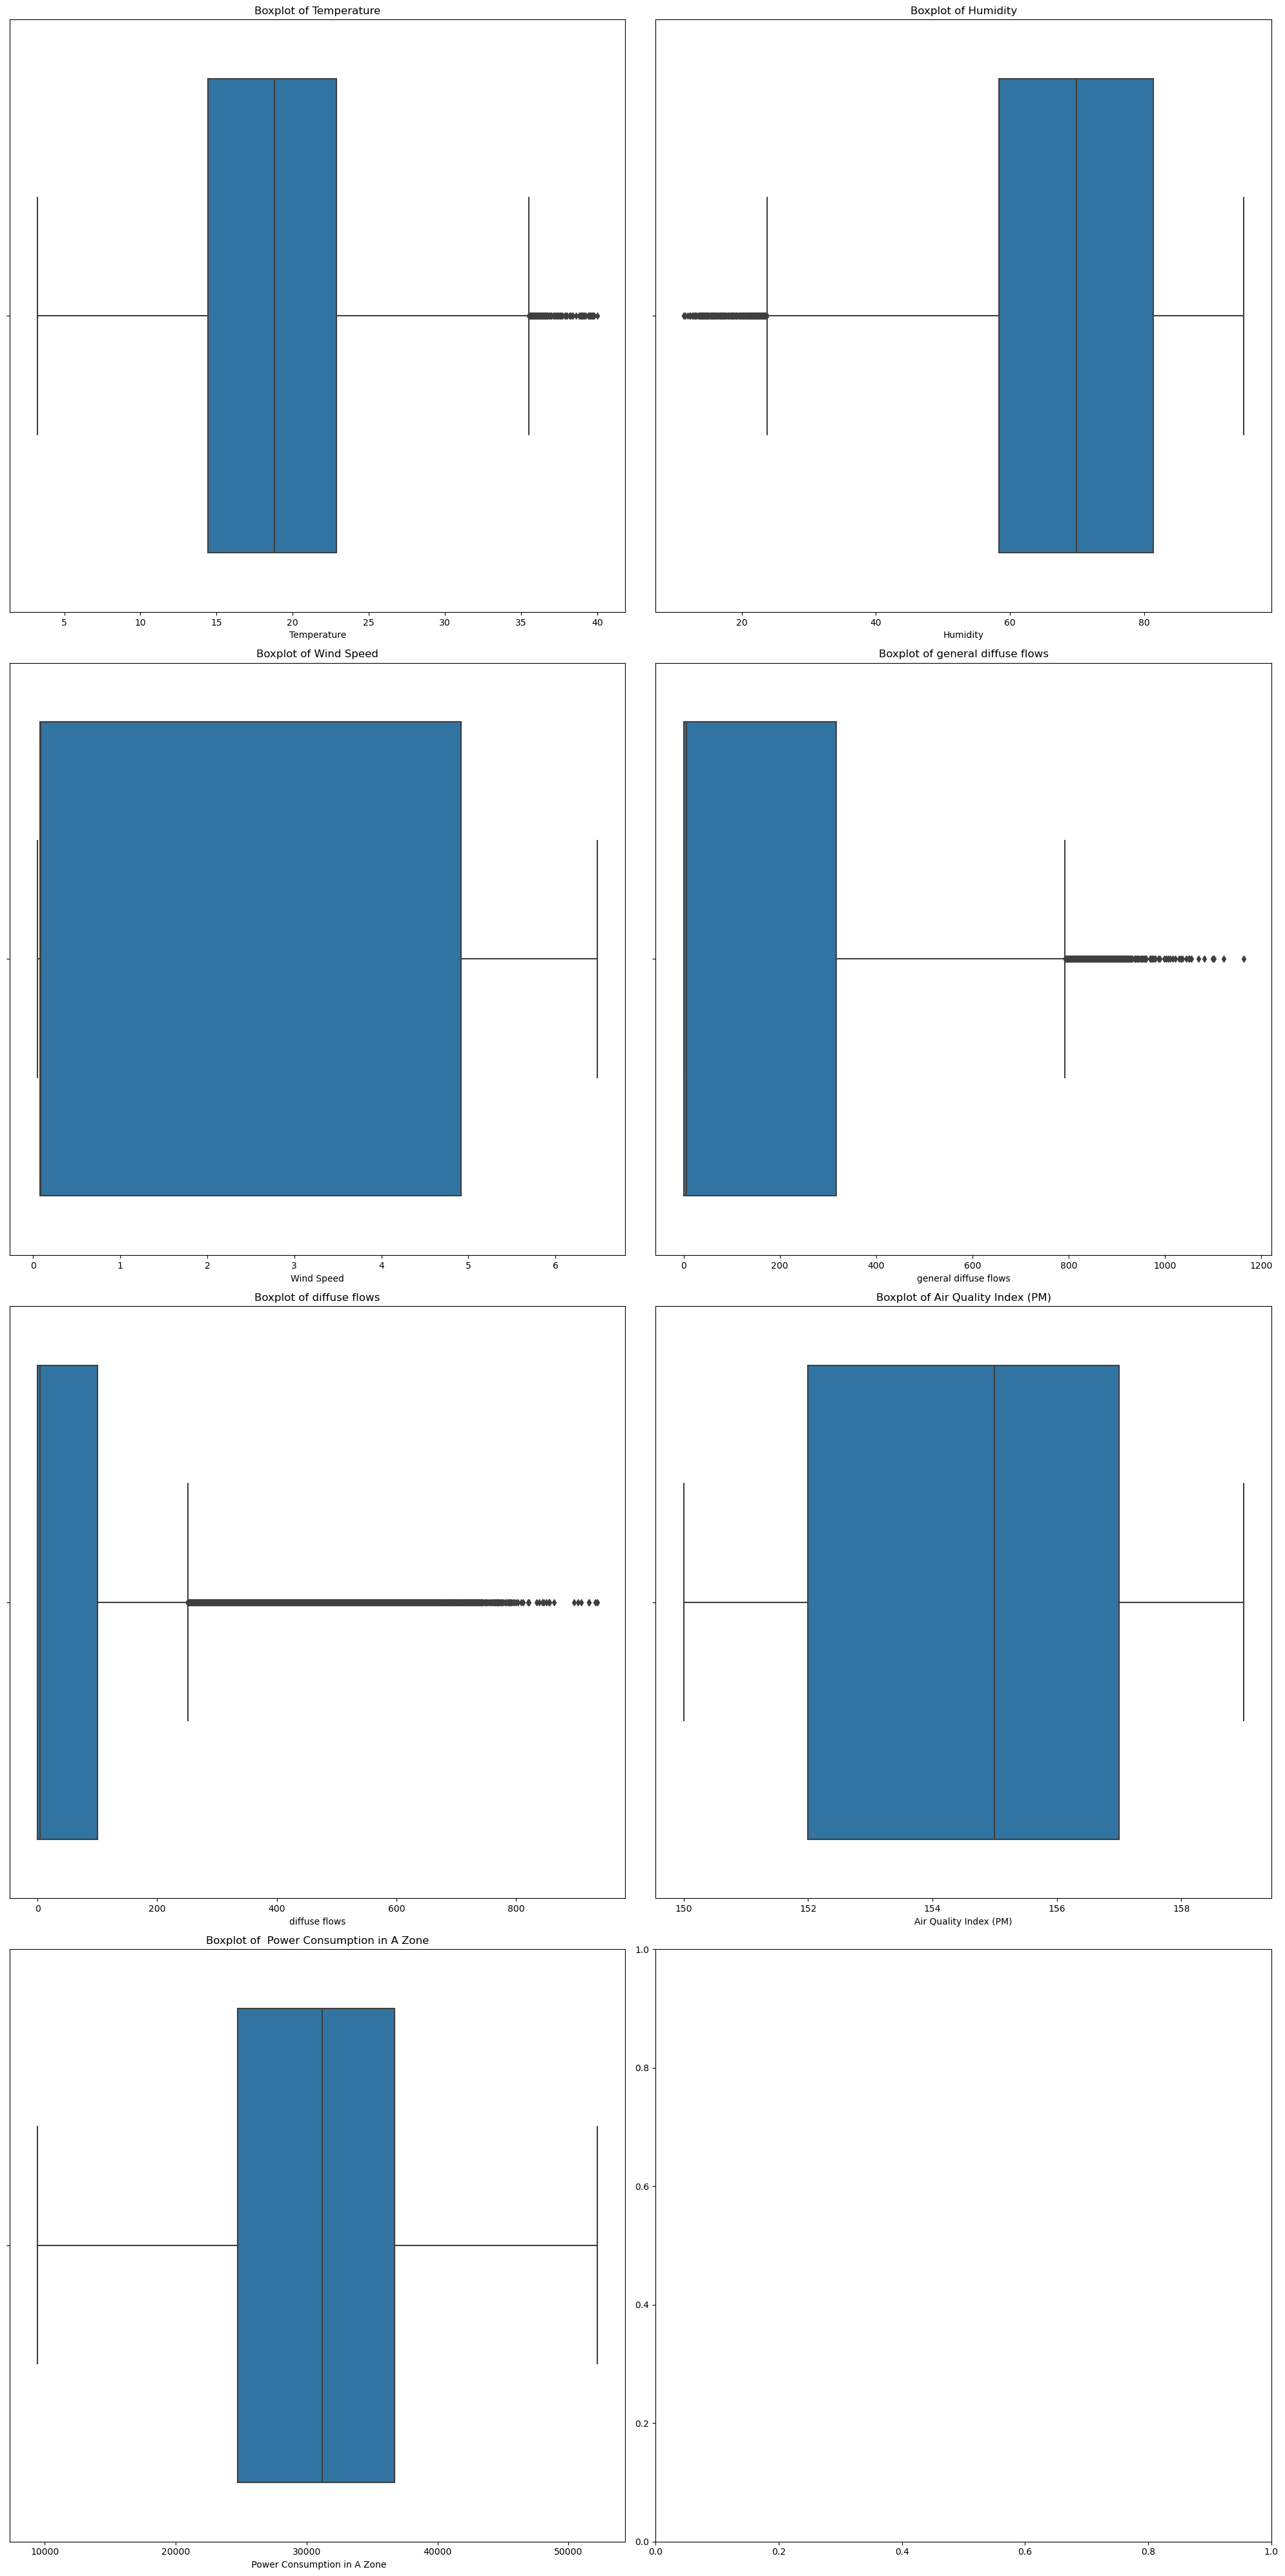

In [112]:
fig, axes = plt.subplots(4,2, figsize=(20, 40))


for ax, col in zip(axes.flatten(), numerical_features):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

In [114]:
## including only numerical columns in new dataframe numerical_features_df
numerical_features_df = df[numerical_features]

## Calculate the IQR for each feature
Q1 = numerical_features_df.quantile(0.25)
Q3 = numerical_features_df.quantile(0.75)

IQR = Q3 - Q1
outlier_threshold = 1.5

outliers = ((numerical_features_df < (Q1 - outlier_threshold * IQR)) | (numerical_features_df > (Q3 + outlier_threshold * IQR)))

# Count the number of outliers in each numerical column
outliers_count = outliers.sum()

print('Outliers count')
print(outliers_count)

Outliers count
Temperature                      154
Humidity                         295
Wind Speed                         0
general diffuse flows           2425
diffuse flows                   4621
Air Quality Index (PM)             0
 Power Consumption in A Zone       0
dtype: int64


In [116]:
# Calculate lower and upper bounds for clipping
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

# Clipping the numerical features to the IQR bounds
numerical_features_df_clipped = numerical_features_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

airlines_df = df.copy()
airlines_df[numerical_features] = numerical_features_df_clipped

# Print to confirm clipping
print("Outlier clipping applied using IQR method.")
print('Original Dataframe size :: ', df.shape)
print('cleaned Dataframe size :: ', airlines_df.shape)

Outlier clipping applied using IQR method.
Original Dataframe size ::  (52583, 9)
cleaned Dataframe size ::  (52583, 9)


In [118]:
## Log transformation for general diffuse flow and diffuse flow to treat skewness

df['general diffuse flows_transformed'] = np.log1p(df['general diffuse flows'])
df['diffuse flows_transformed'] = np.log1p(df['diffuse flows'])


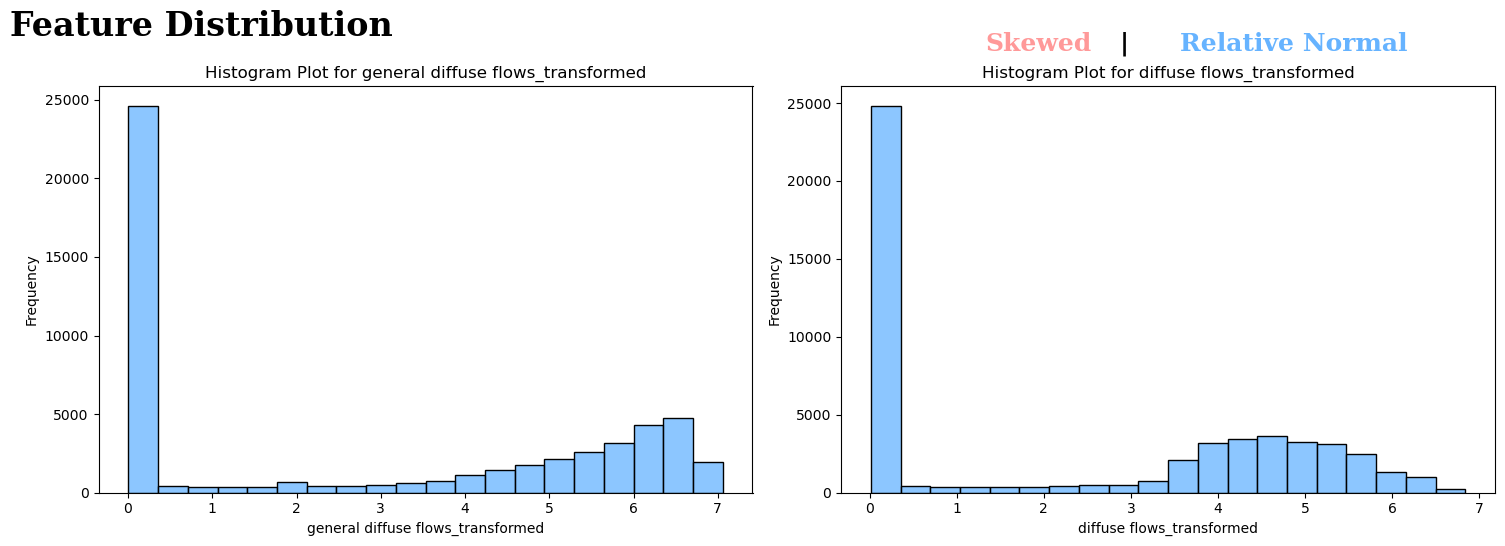

In [120]:
## Histogram plot

features = ['general diffuse flows_transformed','diffuse flows_transformed']

fig, axes = plt.subplots(1,2, figsize = (15,5))
fig.text(0, 1.03, 'Feature Distribution', {'font':'serif', 'size' : 24, 'weight':'bold'}, alpha = 1)
fig.text(0.65, 1, 'Skewed', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#ff9999'})
fig.text(0.74, 1, '|', {'font':'serif', 'size' : 18, 'weight':'bold'})
fig.text(0.78, 1, 'Relative Normal', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#66b3ff'})

axes = axes.flatten()

for i, col in enumerate(features):
    skewness = skew(df[col].dropna())

    if abs(skewness) > 1:
        color = '#ff9999'
    else:
        color = '#66b3ff'

    sns.histplot(df[col], ax = axes[i], kde = False, bins = 20, color = color)
    axes[i].set_title(f"Histogram Plot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

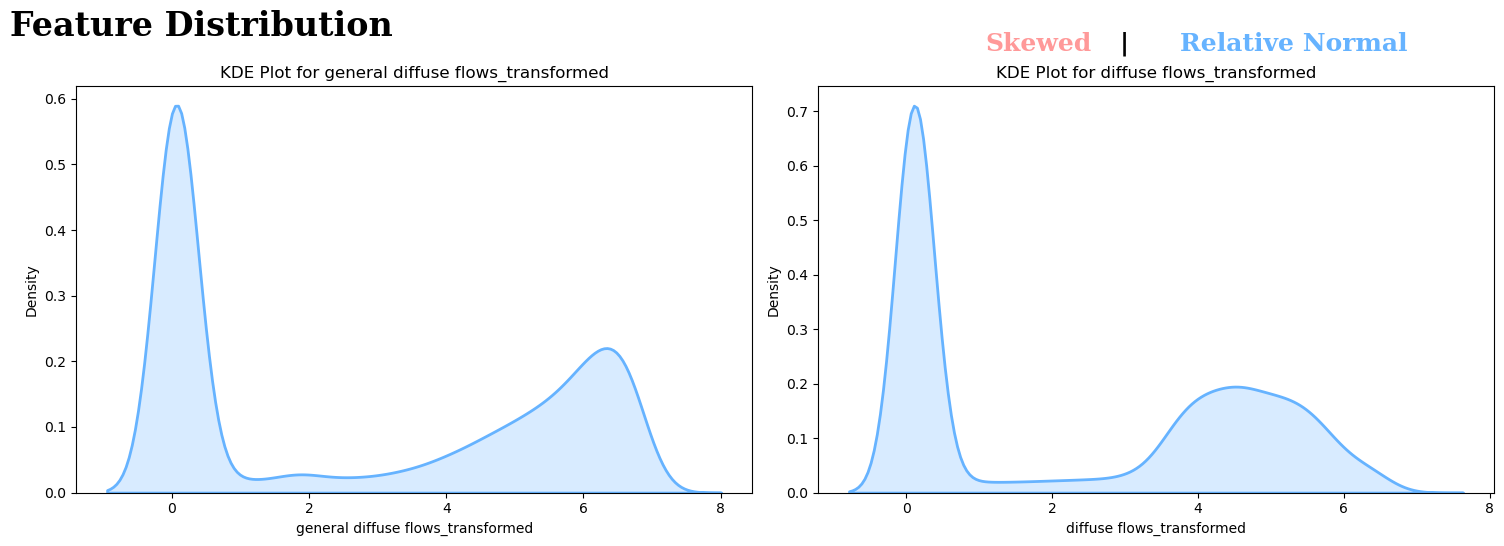

In [122]:
## KDE plot

features = ['general diffuse flows_transformed','diffuse flows_transformed']

fig, axes = plt.subplots(1,2, figsize = (15,5))
fig.text(0, 1.03, 'Feature Distribution', {'font':'serif', 'size' : 24, 'weight':'bold'}, alpha = 1)
fig.text(0.65, 1, 'Skewed', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#ff9999'})
fig.text(0.74, 1, '|', {'font':'serif', 'size' : 18, 'weight':'bold'})
fig.text(0.78, 1, 'Relative Normal', {'font':'serif', 'size' : 18, 'weight':'bold', 'color': '#66b3ff'})

axes = axes.flatten()

for i, col in enumerate(features):
    skewness = skew(df[col].dropna())

    if abs(skewness) > 1:
        color = '#ff9999'
    else:
        color = '#66b3ff'

    sns.kdeplot(df[col], ax=axes[i], fill=True, color=color, linewidth=2)
    axes[i].set_title(f"KDE Plot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

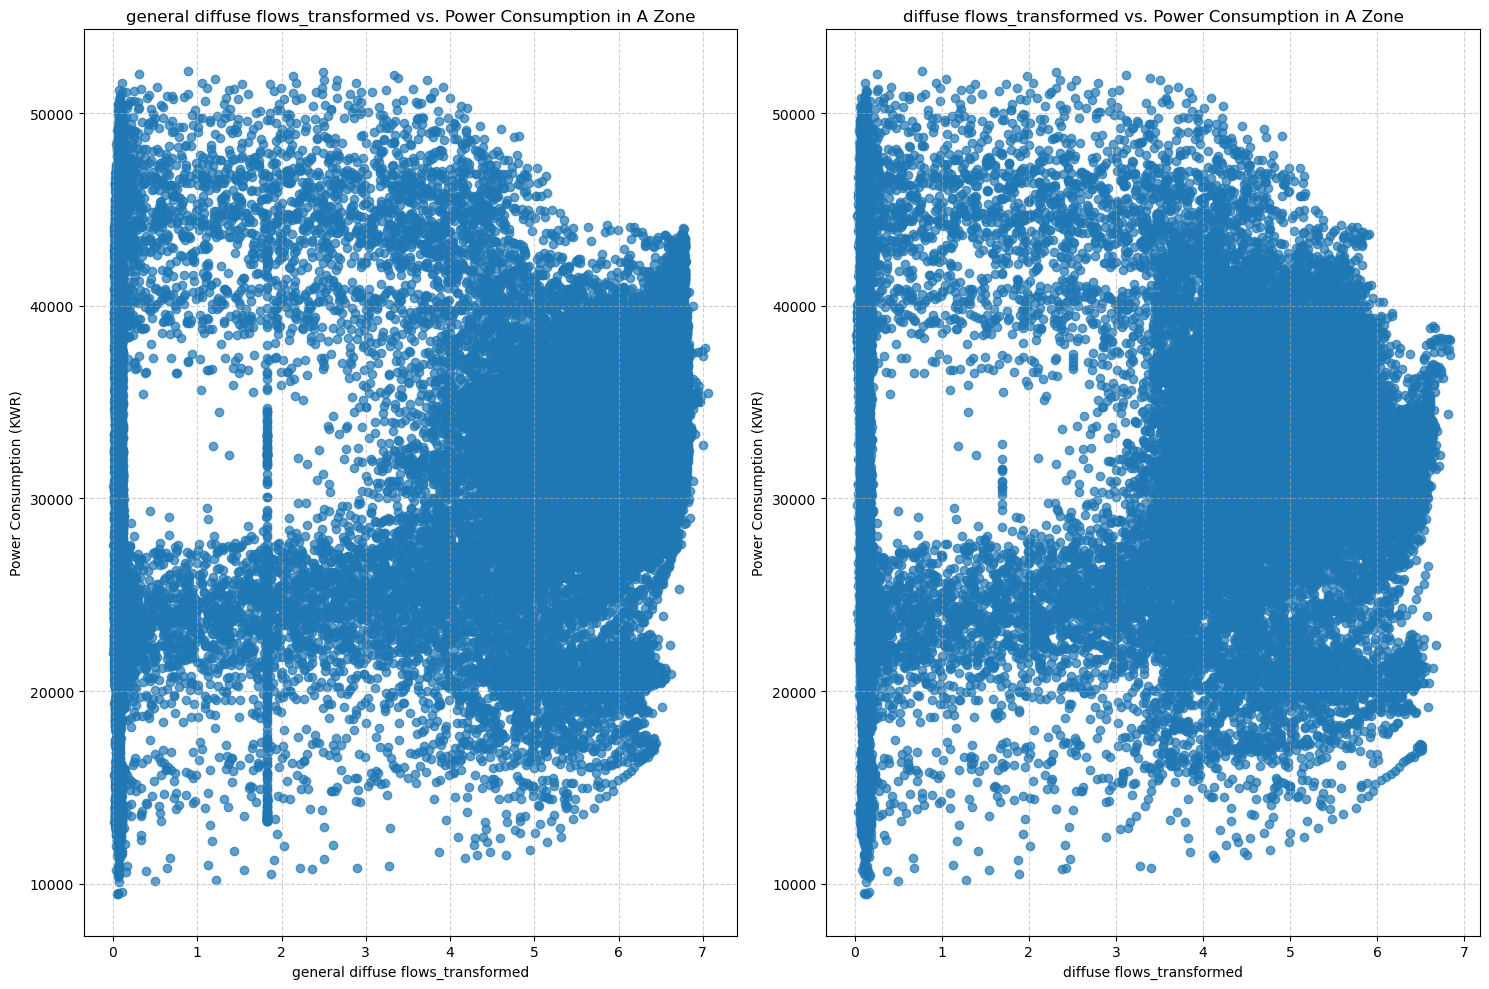

In [124]:
## scatter plot

plt.figure(figsize=(15, 10)) # Adjust figure size as needed

for i, col in enumerate(features):
    plt.subplot(1,2,i+1) # Adjust subplot grid based on number of features
    plt.scatter(df[col], df[' Power Consumption in A Zone'], alpha=0.7)
    plt.title(f'{col} vs. Power Consumption in A Zone')
    plt.xlabel(col)
    plt.ylabel('Power Consumption (KWR)')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [126]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone',
       'general diffuse flows_transformed', 'diffuse flows_transformed'],
      dtype='object')

In [128]:
numerical_features_transformed = df.columns.drop(['S no','general diffuse flows','diffuse flows','Cloudiness'])
numerical_features_transformed

Index(['Temperature', 'Humidity', 'Wind Speed', 'Air Quality Index (PM)',
       ' Power Consumption in A Zone', 'general diffuse flows_transformed',
       'diffuse flows_transformed'],
      dtype='object')

In [130]:
## including only numerical columns in new dataframe numerical_features_df
numerical_features_df = df[numerical_features_transformed]

## Calculate the IQR for each feature
Q1 = numerical_features_df.quantile(0.25)
Q3 = numerical_features_df.quantile(0.75)

IQR = Q3 - Q1
outlier_threshold = 1.5

outliers = ((numerical_features_df < (Q1 - outlier_threshold * IQR)) | (numerical_features_df > (Q3 + outlier_threshold * IQR)))

# Count the number of outliers in each numerical column
outliers_count = outliers.sum()

print('Outliers count')
print(outliers_count)

Outliers count
Temperature                          154
Humidity                             295
Wind Speed                             0
Air Quality Index (PM)                 0
 Power Consumption in A Zone           0
general diffuse flows_transformed      0
diffuse flows_transformed              0
dtype: int64


In [132]:
df.shape

(52583, 11)

In [134]:
# After defining numerical_features_df and ensuring 'Temperature' and 'Humidity' are in it
lower_temp_bound = numerical_features_df['Temperature'].quantile(0.01)
upper_temp_bound = numerical_features_df['Temperature'].quantile(0.99)
numerical_features_df['Temperature'] = numerical_features_df['Temperature'].clip(lower=lower_temp_bound, upper=upper_temp_bound)

lower_humidity_bound = numerical_features_df['Humidity'].quantile(0.01)
upper_humidity_bound = numerical_features_df['Humidity'].quantile(0.99)
numerical_features_df['Humidity'] = numerical_features_df['Humidity'].clip(lower=lower_humidity_bound, upper=upper_humidity_bound)

In [136]:
df.shape

(52583, 11)

In [138]:
# Calculate lower and upper bounds for clipping
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

# Clipping the numerical features to the IQR bounds
numerical_features_df_clipped = numerical_features_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

airlines_df = df.copy()
airlines_df[numerical_features] = numerical_features_df_clipped

# Print to confirm clipping
print("Outlier clipping applied using IQR method.")
print('Original Dataframe size :: ', df.shape)
print('cleaned Dataframe size :: ', airlines_df.shape)

Outlier clipping applied using IQR method.
Original Dataframe size ::  (52583, 11)
cleaned Dataframe size ::  (52583, 11)


## correlation

In [140]:
numerical_features_transformed

Index(['Temperature', 'Humidity', 'Wind Speed', 'Air Quality Index (PM)',
       ' Power Consumption in A Zone', 'general diffuse flows_transformed',
       'diffuse flows_transformed'],
      dtype='object')

In [142]:
columns_to_exclude = ['S no','general diffuse flows', 'diffuse flows']
df_transformed = df.drop(columns = columns_to_exclude)
df_transformed.head()

,Temperature,Humidity,Wind Speed,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,general diffuse flows_transformed,diffuse flows_transformed
0,6.559,73.8,0.083,158.0,1,34055.69620,0.049742,0.112435
1,6.414,74.5,0.083,159.0,1,29814.68354,0.067659,0.081580
2,6.313,74.5,0.080,151.0,1,29128.10127,0.060154,0.095310
3,6.121,75.0,0.083,151.0,1,28228.86076,0.087095,0.091667
4,5.921,75.7,0.081,154.0,1,27335.69620,0.046884,0.081580


In [144]:
df_transformed.shape

(52583, 8)

Text(0.5, 1.0, 'Correlation Matrix')

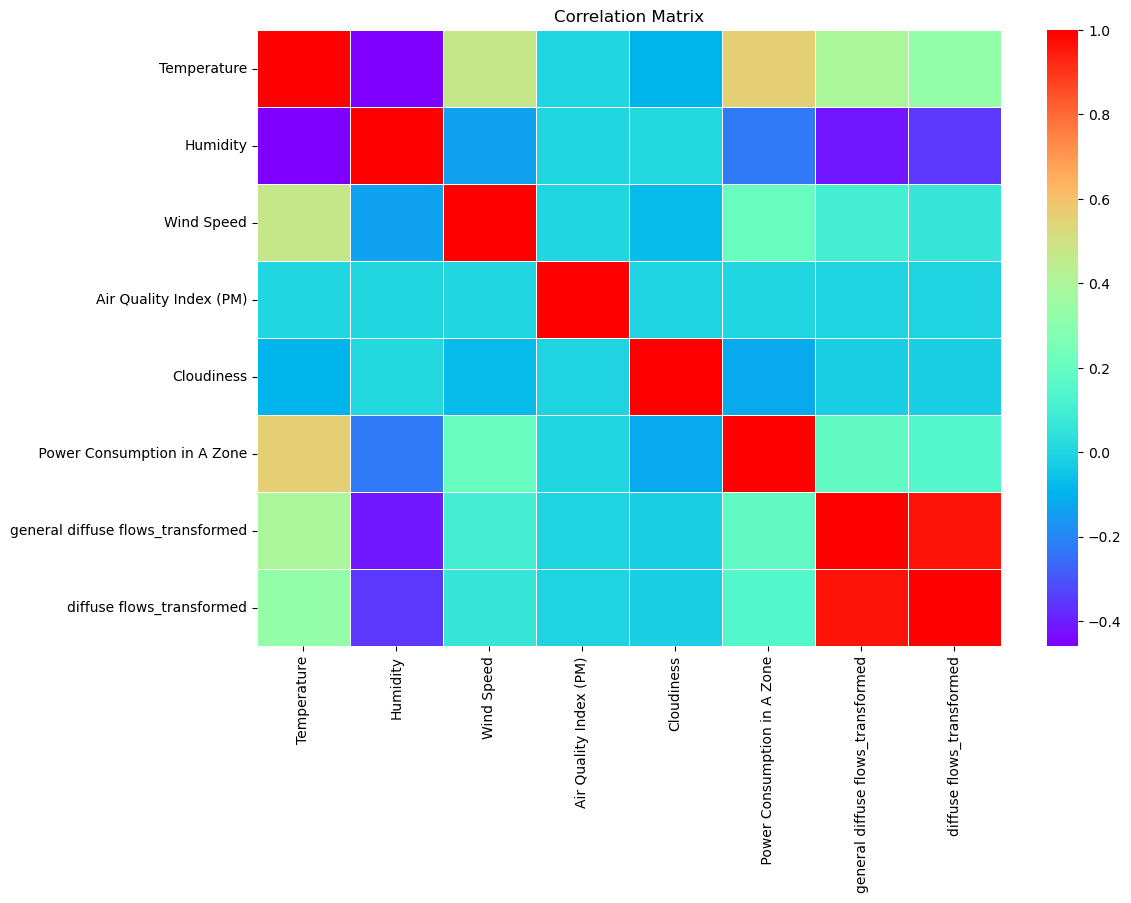

In [146]:
# Calculate the correlation matrix
correlation_matrix = df_transformed.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')

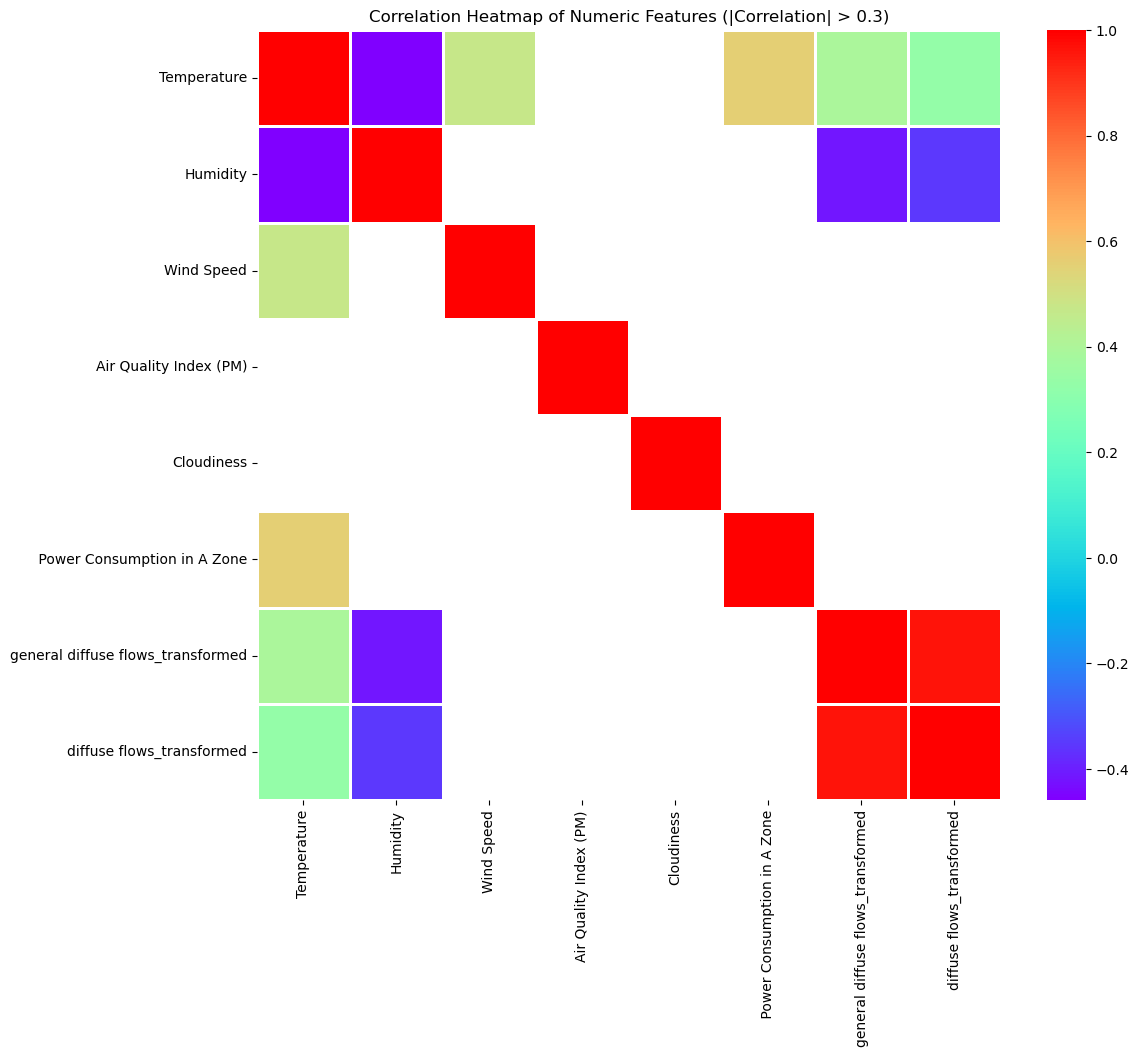

In [221]:
## Plotting only for correlation greater than 0.5 or less than -0.5
correlation_matrix_filtered = correlation_matrix[(correlation_matrix > 0.3) | (correlation_matrix < -0.3)]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, cmap='rainbow', fmt=".2f", linewidths=0.8)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.3)')
plt.show()

In [148]:
# Extracting correlations with 'power consumption in a zone'
zone_correlation = correlation_matrix[' Power Consumption in A Zone']

# Select strong correlations (absolute value > 0.3) and exclude ' Power Consumption in A Zone' itself
strong_correlations = zone_correlation[(zone_correlation.abs() > 0.3) & (zone_correlation.index != 'Satisfaction')]

# Sort in ascending order
strong_correlations = strong_correlations.sort_values(ascending = False)

print("Strong correlations (>|0.3|) with ' Power Consumption in A Zone:")
print(f"{'Feature':<25} {'Correlation':>10}")
for feature, corr_value in strong_correlations.items():
    print(f"{feature:<25} {corr_value:>10.5f}")

Strong correlations (>|0.3|) with ' Power Consumption in A Zone:
Feature                   Correlation
 Power Consumption in A Zone    1.00000
Temperature                  0.55868


### __df_transformed__ is the current dataset that i will follow

## __Feature engineering__

In [150]:
from sklearn.preprocessing import PolynomialFeatures

features_for_engineering = df[['Temperature', 'Humidity', 'Wind Speed',
                               'general diffuse flows_transformed', 'diffuse flows_transformed',
                               'Air Quality Index (PM)', 'Cloudiness']]

# --- 1. Create Interaction Features ---
# Using PolynomialFeatures with interaction_only=True and degree=2
# This will create all unique pairwise interaction terms (e.g., A*B)
# and also include the original features (if include_bias=False, we would exclude them here but we will concatenate later)
# We set include_bias=False to avoid creating a column of ones.
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly_interaction.fit_transform(features_for_engineering)

# Get the names for the new interaction features
interaction_feature_names = poly_interaction.get_feature_names_out(features_for_engineering.columns)
df_interaction = pd.DataFrame(interaction_features, columns=interaction_feature_names, index=df.index)

# Filter out original features from the interaction dataframe to only keep the *new* interaction terms
# These are features with '_' indicating interaction (e.g., 'A_B')
interaction_only_df = df_interaction.loc[:, [col for col in df_interaction.columns if '_' in col]]

# --- 2. Create Polynomial Features (e.g., squared terms) ---
# Using PolynomialFeatures with degree=2 (default interaction_only=False, so it includes polynomial terms and interactions)
# To get *only* polynomial terms without interactions (or if we want to add interactions separately), we can be careful
# Here, we want polynomial terms *of individual features*.
# Let's focus on Temperature for a clear example, and then extend.
# If we want a general set of polynomial features of degree 2 for *all* selected features (e.g., A^2, B^2, but also A*B if interaction_only=False)
# For the user's request "polynomial features", it usually means individual feature powers.
# Let's create quadratic terms (degree=2) for individual features.
# A simpler way to get just polynomial terms (like x^2, y^2) is to iterate or use PolynomialFeatures with degree and then filter.

# For simplicity and clarity, let's create quadratic terms (degree 2) for each of the selected features.
# This will create features like Temperature^2, Humidity^2, etc.
polynomial_features_dict = {}
for col in features_for_engineering.columns:
    polynomial_features_dict[f'{col}_squared'] = features_for_engineering[col]**2

df_polynomial = pd.DataFrame(polynomial_features_dict, index=df.index)


# Concatenate the new features to the original DataFrame
# Ensure no duplicate columns are created if original features are already in df_interaction or df_polynomial
df_fe = pd.concat([df, interaction_only_df, df_polynomial], axis=1)

# Display the head of the new DataFrame to show the added columns
print("DataFrame with new Interaction and Polynomial Features:")
print(df_fe.head())

# Also display the names of the new columns created
print("\nNew Interaction Feature Names:")
print(interaction_only_df.columns.tolist())
print("\nNew Polynomial Feature Names:")
print(df_polynomial.columns.tolist())

DataFrame with new Interaction and Polynomial Features:
   S no  Temperature  Humidity  Wind Speed  general diffuse flows  \
0     1        6.559      73.8       0.083                  0.051   
1     2        6.414      74.5       0.083                  0.070   
2     3        6.313      74.5       0.080                  0.062   
3     4        6.121      75.0       0.083                  0.091   
4     5        5.921      75.7       0.081                  0.048   

   diffuse flows  Air Quality Index (PM)  Cloudiness  \
0          0.119                   158.0           1   
1          0.085                   159.0           1   
2          0.100                   151.0           1   
3          0.096                   151.0           1   
4          0.085                   154.0           1   

    Power Consumption in A Zone  general diffuse flows_transformed  ...  \
0                   34055.69620                           0.049742  ...   
1                   29814.68354           

In [152]:
df_fe.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,general diffuse flows_transformed,...,general diffuse flows_transformed Cloudiness,diffuse flows_transformed Air Quality Index (PM),diffuse flows_transformed Cloudiness,Temperature_squared,Humidity_squared,Wind Speed_squared,general diffuse flows_transformed_squared,diffuse flows_transformed_squared,Air Quality Index (PM)_squared,Cloudiness_squared
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620,0.049742,...,0.049742,17.764798,0.112435,43.020481,5446.44,0.006889,0.002474,0.012642,24964.0,1
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354,0.067659,...,0.067659,12.971218,0.081580,41.139396,5550.25,0.006889,0.004578,0.006655,25281.0,1
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127,0.060154,...,0.060154,14.391837,0.095310,39.853969,5550.25,0.006400,0.003618,0.009084,22801.0,1
3,4,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076,0.087095,...,0.087095,13.841745,0.091667,37.466641,5625.00,0.006889,0.007585,0.008403,22801.0,1
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620,0.046884,...,0.046884,12.563318,0.081580,35.058241,5730.49,0.006561,0.002198,0.006655,23716.0,1


In [154]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   S no                                                         52583 non-null  int64  
 1   Temperature                                                  52583 non-null  float64
 2   Humidity                                                     52583 non-null  float64
 3   Wind Speed                                                   52583 non-null  float64
 4   general diffuse flows                                        52583 non-null  float64
 5   diffuse flows                                                52583 non-null  float64
 6   Air Quality Index (PM)                                       52583 non-null  float64
 7   Cloudiness                                                   52583 non-null 

Text(0.5, 1.0, 'Correlation Matrix')

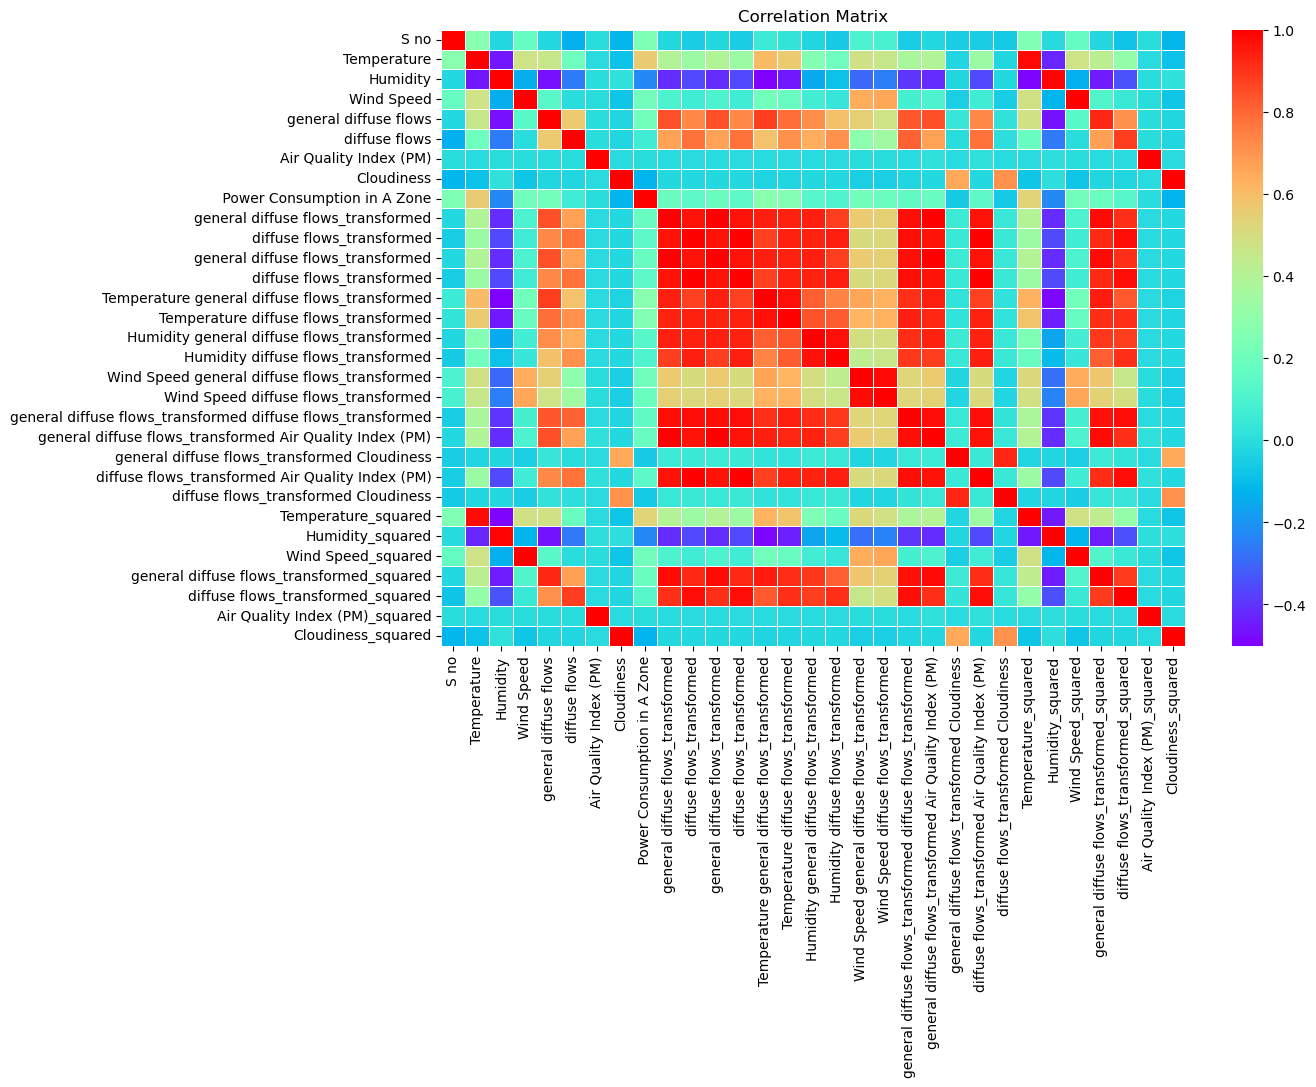

In [156]:
# reevaluatethe correlation matrix
correlation_matrix = df_fe.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')

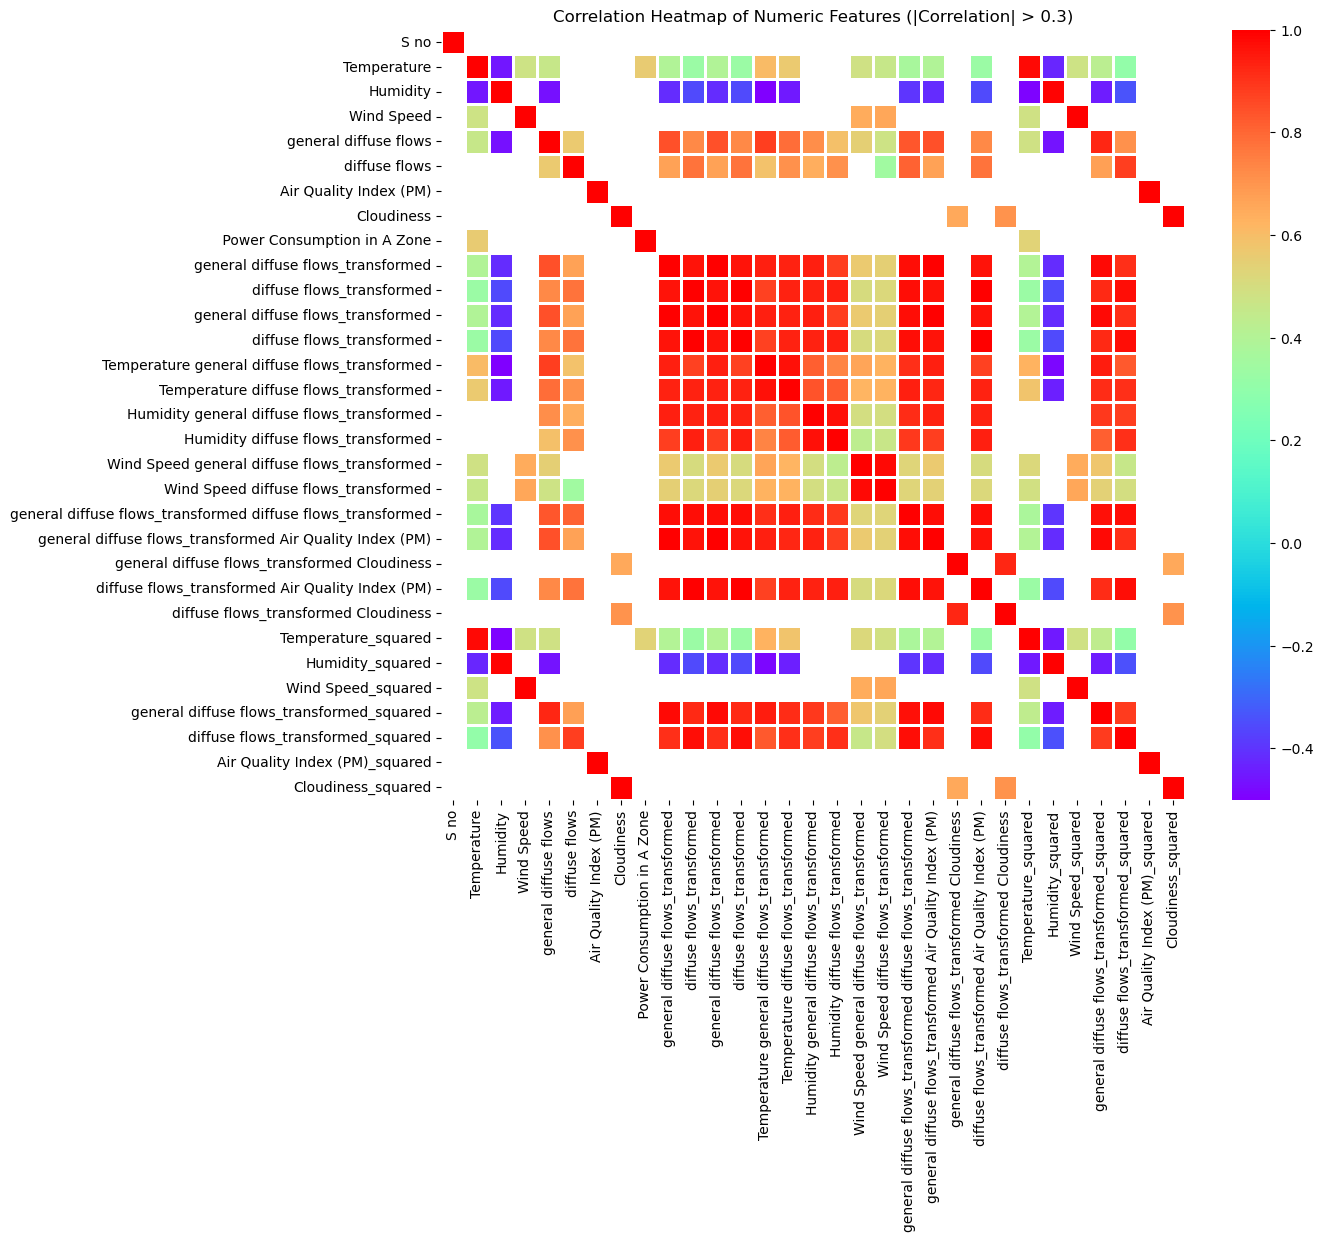

In [158]:
## Plotting only for correlation greater than 0.5 or less than -0.5
correlation_matrix_filtered = correlation_matrix[(correlation_matrix > 0.3) | (correlation_matrix < -0.3)]

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filtered, cmap='rainbow', fmt=".2f", linewidths=0.8)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.3)')
plt.show()

In [160]:
# Extracting correlations with 'power consumption in a zone'
zone_correlation = correlation_matrix[' Power Consumption in A Zone']

# Select strong correlations (absolute value > 0.3) and exclude ' Power Consumption in A Zone' itself
strong_correlations = zone_correlation[(zone_correlation.abs() > 0.3) & (zone_correlation.index != 'Satisfaction')]

# Sort in ascending order
strong_correlations = strong_correlations.sort_values(ascending = False)

print("Strong correlations (>|0.3|) with ' Power Consumption in A Zone:")
print(f"{'Feature':<25} {'Correlation':>10}")
for feature, corr_value in strong_correlations.items():
    print(f"{feature:<25} {corr_value:>10.5f}")

Strong correlations (>|0.3|) with ' Power Consumption in A Zone:
Feature                   Correlation
 Power Consumption in A Zone    1.00000
Temperature                  0.55868
Temperature_squared          0.53291


- From newly added features only "Temperature_squared" has strong correlation with Power consumption. So i will add only this feature to my dataset 'df_transformed'

In [162]:
df_transformed['Temperature_squared'] = df_fe['Temperature_squared']

In [164]:
df_transformed.head()

,Temperature,Humidity,Wind Speed,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,general diffuse flows_transformed,diffuse flows_transformed,Temperature_squared
0,6.559,73.8,0.083,158.0,1,34055.69620,0.049742,0.112435,43.020481
1,6.414,74.5,0.083,159.0,1,29814.68354,0.067659,0.081580,41.139396
2,6.313,74.5,0.080,151.0,1,29128.10127,0.060154,0.095310,39.853969
3,6.121,75.0,0.083,151.0,1,28228.86076,0.087095,0.091667,37.466641
4,5.921,75.7,0.081,154.0,1,27335.69620,0.046884,0.081580,35.058241


Text(0.5, 1.0, 'Correlation Matrix')

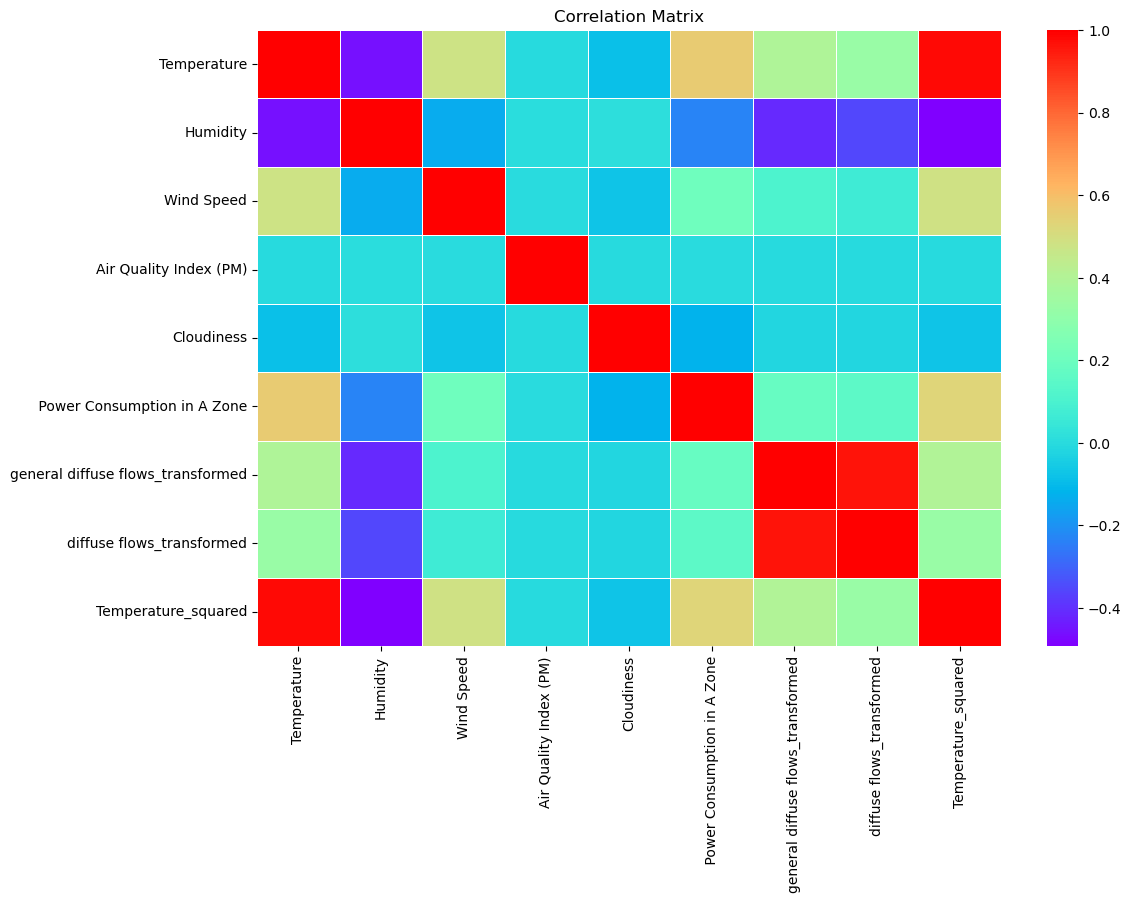

In [166]:
# reevaluatethe correlation matrix
correlation_matrix = df_transformed.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Matrix')

## __Data scaling__

In [258]:
numeric_features = df_transformed.columns.drop(['Cloudiness'])
numeric_features

Index(['Temperature', 'Humidity', 'Wind Speed', 'Air Quality Index (PM)',
       ' Power Consumption in A Zone', 'general diffuse flows_transformed',
       'diffuse flows_transformed', 'Temperature_squared'],
      dtype='object')

In [262]:
scale = MinMaxScaler()

for col in numeric_features:
    df_transformed[[col]] = scale.fit_transform(df_transformed[[col]])

In [264]:
df_transformed.head()

,Temperature,Humidity,Wind Speed,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,general diffuse flows_transformed,diffuse flows_transformed,Temperature_squared
0,0.090091,0.748382,0.005130,0.888889,1,0.575436,0.006484,0.014856,0.020423
1,0.086146,0.756770,0.005130,1.000000,1,0.476223,0.009024,0.010340,0.019240
2,0.083399,0.756770,0.004663,0.111111,1,0.460161,0.007960,0.012350,0.018432
3,0.078176,0.762761,0.005130,0.111111,1,0.439125,0.011778,0.011816,0.016930
4,0.072736,0.771148,0.004819,0.444444,1,0.418230,0.006079,0.010340,0.015416


## __Model Building and Evaluation::__

### __train and test split__

In [268]:
X = df_transformed.drop([' Power Consumption in A Zone'], axis = 1)
y = df_transformed[' Power Consumption in A Zone']

## Spliting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Checking the shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (42066, 8), (42066,)
Test set shape: (10517, 8), (10517,)


### __Model training and evaluation__

In [273]:
## Dictionary for models (Regression Models)
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error

    results.append((name, r2, mse, rmse, mae))

print("\n--- Model Evaluation Results ---")
print(f"{'Model':<25} {'R-squared':>10} {'MSE':>10} {'RMSE':>10} {'MAE':>10}")
for name, r2, mse, rmse, mae in results:
    print(f"{name:<25} {r2:>10.4f} {mse:>10.4f} {rmse:>10.4f} {mae:>10.4f}")

print("\nNote: For regression tasks, we use metrics like R-squared, MSE, RMSE, and MAE.")
print("A higher R-squared value (closer to 1) indicates a better fit.")
print("Lower MSE, RMSE, and MAE values indicate better accuracy.")

Training Linear Regression...
Training SGD Regressor...
Training Random Forest Regressor...
Training XGBoost Regressor...

--- Model Evaluation Results ---
Model                      R-squared        MSE       RMSE        MAE
Linear Regression             0.3335     0.0236     0.1535     0.1233
SGD Regressor                 0.3225     0.0240     0.1548     0.1253
Random Forest Regressor       0.6372     0.0128     0.1132     0.0793
XGBoost Regressor             0.5522     0.0158     0.1258     0.0929

Note: For regression tasks, we use metrics like R-squared, MSE, RMSE, and MAE.
A higher R-squared value (closer to 1) indicates a better fit.
Lower MSE, RMSE, and MAE values indicate better accuracy.


__Random Forest Regressor__ performs the best overall, with the highest R-squared (0.6372) and the lowest error metrics (MSE, RMSE, MAE), indicating a strong fit to the data.

In [275]:
print("--- Starting Hyperparameter Tuning for Random Forest Regressor ---")

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_features': [0.6, 0.8, 1.0], # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
# cv=5 for 5-fold cross-validation
# scoring='neg_mean_squared_error' to optimize for lower MSE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\n--- Hyperparameter Tuning Complete ---")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_ # Convert back to positive MSE

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation MSE (from Grid Search): {best_score:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

r2_best_rf = r2_score(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("\n--- Evaluation of Best Random Forest Model on Test Set ---")
print(f"R-squared (R2): {r2_best_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_best_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best_rf:.4f}")


--- Starting Hyperparameter Tuning for Random Forest Regressor ---
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.5s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.7s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.6s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.0s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.9s
[CV] END max_depth=None, max_features=0.6, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=None,

- After tuning, the Random Forest Regressor slightly improved in performance
- Cross-validation MSE from Grid Search: 0.0135, indicating stable generalization.

                             Feature  Importance
0                        Temperature    0.237095
7                Temperature_squared    0.228959
1                           Humidity    0.169479
5  general diffuse flows_transformed    0.114346
2                         Wind Speed    0.111742
6          diffuse flows_transformed    0.096450
3             Air Quality Index (PM)    0.035477
4                         Cloudiness    0.006451


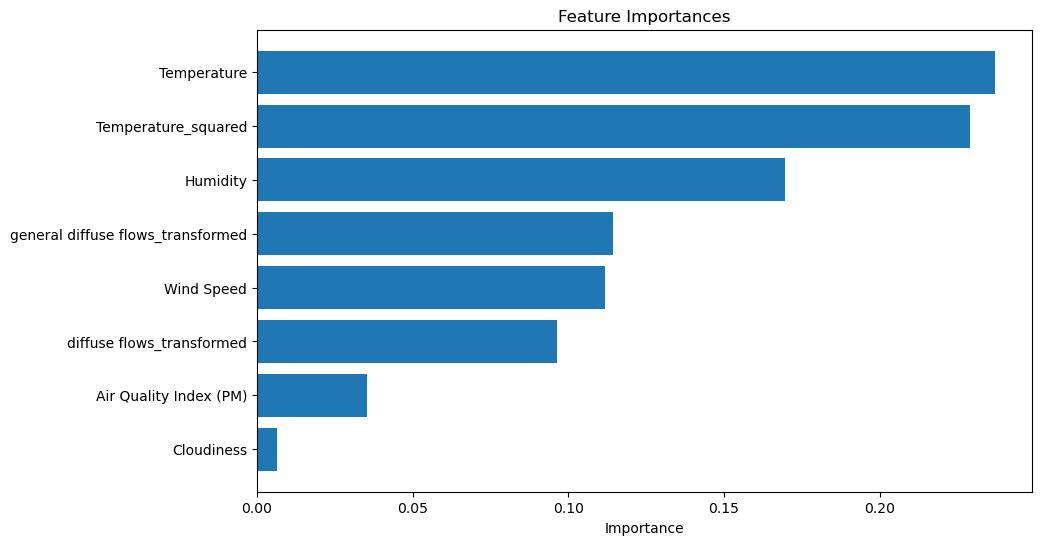

In [279]:
importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances with column names
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()